# Lab №2

## Выполнение

### 0. Импортируем необходимые библиотеки 

In [1]:
from math import pi
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import spatialmath.base as sb

### 1. Импортируем модель UR5

In [2]:
robot = rtb.models.DH.UR5()
print(robot)

DHRobot: UR5 (by Universal Robotics), 6 joints (RRRRRR), dynamics, standard DH parameters
┌─────┬─────────┬─────────┬────────┐
│ θⱼ  │   dⱼ    │   aⱼ    │   ⍺ⱼ   │
├─────┼─────────┼─────────┼────────┤
│  q1 │ 0.08946 │       0 │  90.0° │
│  q2 │       0 │  -0.425 │   0.0° │
│  q3 │       0 │ -0.3922 │   0.0° │
│  q4 │  0.1091 │       0 │  90.0° │
│  q5 │ 0.09465 │       0 │ -90.0° │
│  q6 │  0.0823 │       0 │   0.0° │
└─────┴─────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘

┌──────┬───────┬─────┬─────┬─────┬──────┬─────┐
│ name │ q0    │ q1  │ q2  │ q3  │ q4   │ q5  │
├──────┼───────┼─────┼─────┼─────┼──────┼─────┤
│   qr │  180° │  0° │  0° │  0° │  90° │  0° │
│   qz │  0°   │  0° │  0° │  0° │  0°  │  0° │
└──────┴───────┴─────┴─────┴─────┴──────┴─────┘



In [3]:
robot.links[0].m = 25
robot.links[1].m = 27
robot.links[2].m = 15
robot.links[3].m = 10
robot.links[4].m = 2.5
robot.links[5].m = 1.5
robot.links[0].r = [0, 0, 0]
robot.links[1].r = [-0.05, 0.006, 0.1]
robot.links[2].r = [-0.0203, -0.0141, 0.070]
robot.links[3].r = [0, 0.019, 0]
robot.links[4].r = [0, 0, 0]
robot.links[5].r = [0, 0, 0.032]
robot.links[0].I = [0, 0.35, 0, 0, 0, 0]
robot.links[1].I = [0.13, 0.524, 0.539, 0, 0, 0]
robot.links[2].I = [0.066, 0.086, 0.0125, 0, 0, 0]
robot.links[3].I = [0.0018, 0.0013, 0.0018, 0, 0, 0]
robot.links[4].I = [0.0003, 0.0004, 0.0003, 0, 0, 0]
robot.links[5].I = [0.00015, 0.00015, 0.00004, 0, 0, 0]
robot.links[0].Jm = 0.0004
robot.links[1].Jm = 0.0004
robot.links[2].Jm = 0.0004
robot.links[3].Jm = 0.000033
robot.links[4].Jm = 0.000033
robot.links[5].Jm = 0.000033
robot.links[0].B = 0.0015
robot.links[1].B = 0.000817
robot.links[2].B = 0.00138
robot.links[3].B = 0.0000712
robot.links[4].B = 0.0000826
robot.links[5].B = 0.0000367
robot.links[0].Tc = [0.395, -0.435]
robot.links[1].Tc = [0.126, -0.071]
robot.links[2].Tc = [0.132, -0.105]
robot.links[3].Tc = [0.0112, -0.0169]
robot.links[4].Tc = [0.00926, -0.0145]
robot.links[5].Tc = [0.00396, -0.0105]
robot.links[0].G = 300
robot.links[1].G = 300
robot.links[2].G = 300
robot.links[3].G = 300
robot.links[4].G = 300
robot.links[5].G = 300
robot.links[0].qlim = [-np.pi, np.pi]
robot.links[1].qlim = [-np.pi, np.pi]
robot.links[2].qlim = [-np.pi, np.pi]
robot.links[3].qlim = [-np.pi, np.pi]
robot.links[4].qlim = [-np.pi, np.pi]
robot.links[5].qlim = [-np.pi, np.pi]

### 2. Зададим начальное положение робота и построим его

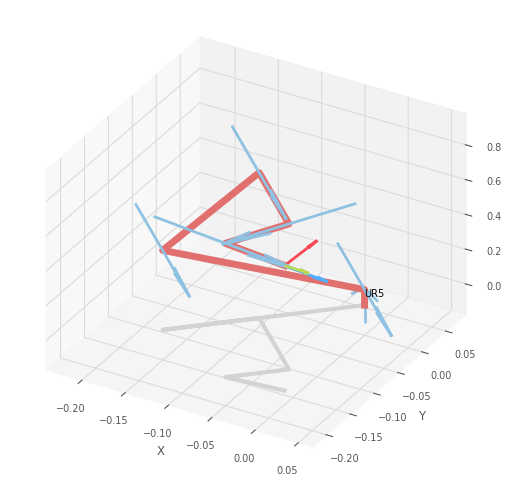

<Figure size 640x480 with 0 Axes>

In [4]:
q_start = [pi/4, -pi/3, -pi/4, pi/3, -pi/3, pi/4]
robot.plot(q_start)
plt.show()

### 3. Решим прямую задачу кинематики

In [5]:
T_start = robot.fkine(q_start)
print(T_start)

   0.09732   0.6098    0.7866    0.01612   
   0.9633   -0.2562    0.07946  -0.1964    
   0.25      0.75     -0.6124    0.7191    
   0         0         0         1         



### 6. Построим рабочую зону манипулятора

Инициализируем переменные

In [6]:
n = 20  # Количество точек по каждой оси
i = 0  # Просто счетчик
move = [np.linspace(robot.links[i].qlim[0], robot.links[i].qlim[1], n) for i in range(3)]  # Записываем пределы перемещения для первых трех звеньев
pose = np.zeros([3,n**3])  # Создаем пустой массив для записи данных

Рассчитываем рабочую зону

In [7]:
# Проходимся перебором по каждой точке
for q1 in move[0]:
    for q2 in move[1]:
        for q3 in move[2]:
            Tt = robot.fkine([q1,q2,q3,0,0,0])  # Решаем ПЗК, меняя только первые 3 обобщенных координаты
            for j in range(3):
                pose[j][i] = Tt.t[j]  # Сохраняем точку
            i += 1

Строим рабочую зону

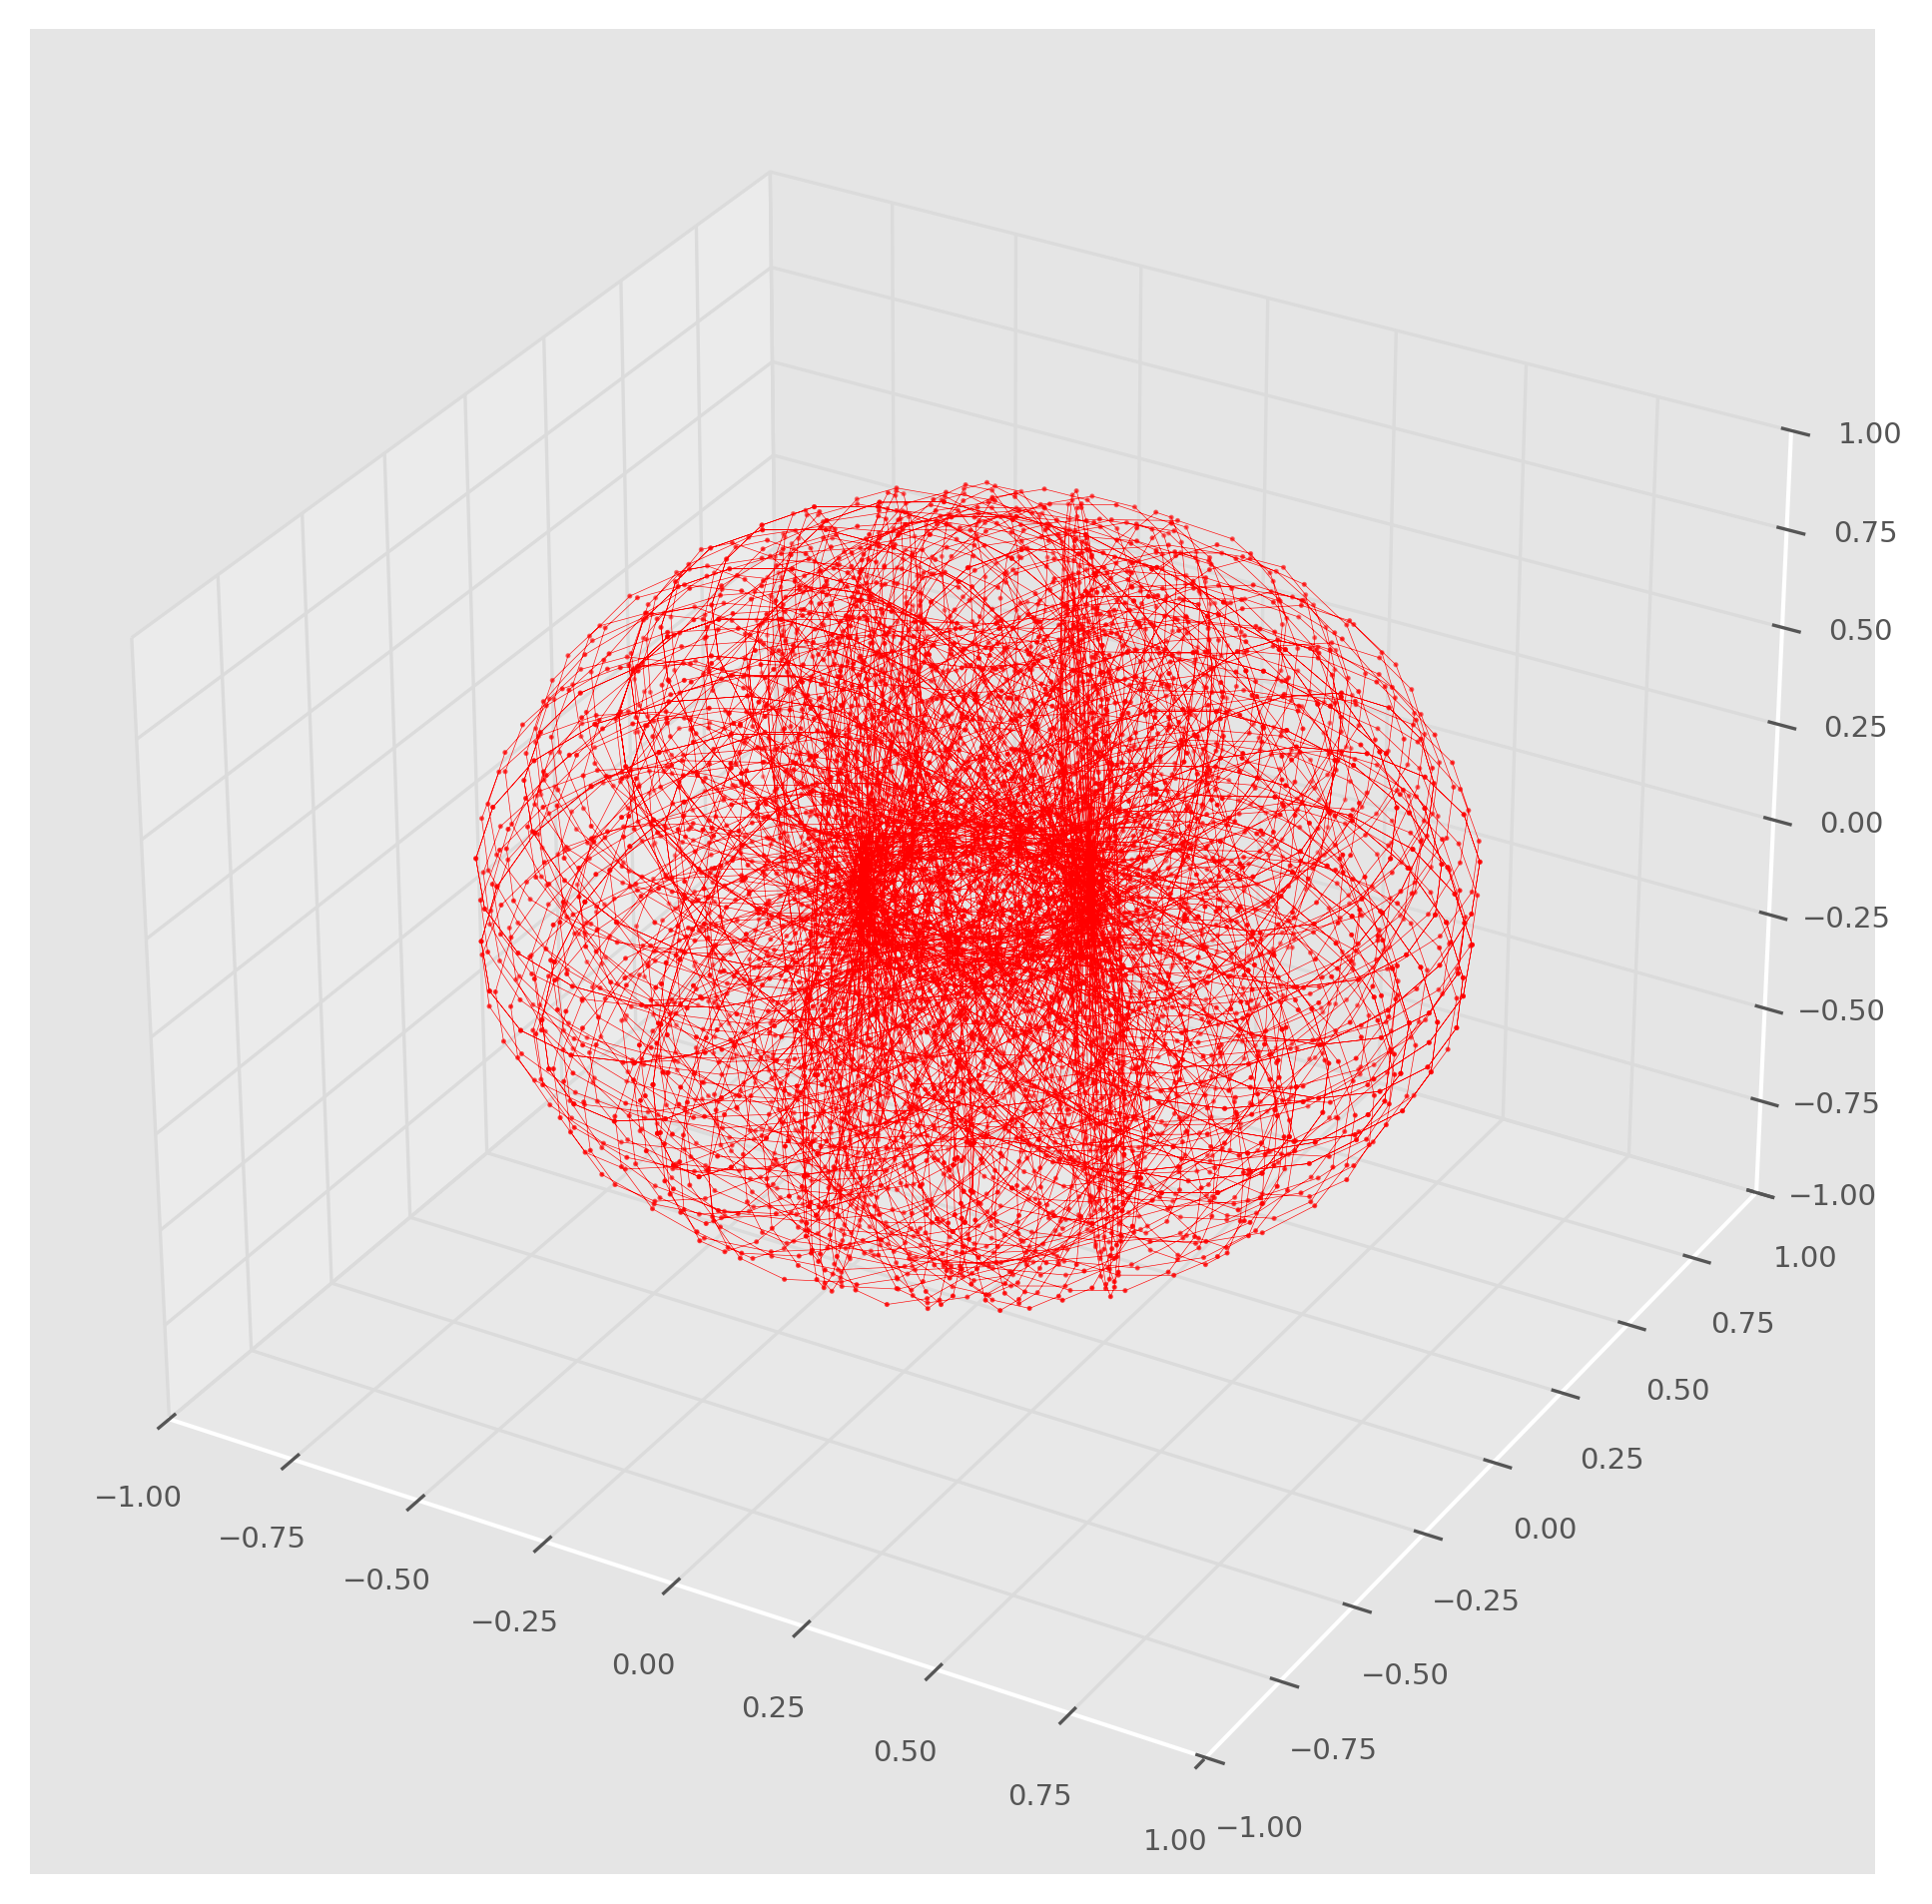

In [8]:
plt.figure(figsize=(8,8), dpi=300)
ax = plt.axes(projection="3d")
ax.plot3D(pose[0], pose[1], pose[2], color='red', linewidth=0.15)
ax.scatter3D(pose[0], pose[1], pose[2], s=0.5, color='red')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

### 7. Выберем конечную точку и проверим её (решим обратную задачу кинематики)

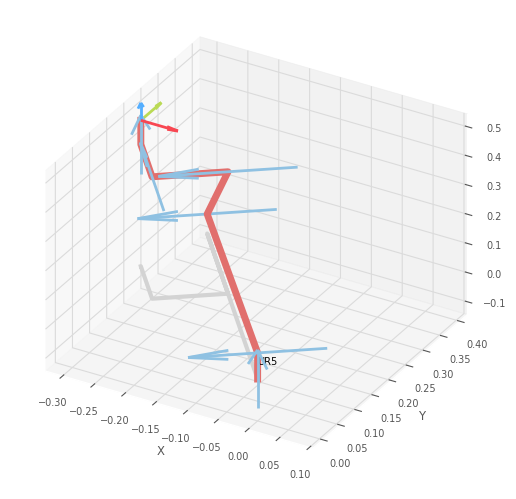

<Figure size 640x480 with 0 Axes>

In [9]:
point = [-0.3,0.2,0.5]
T_end = sb.transl(point)
q_end = robot.ikine_GN(T_end).q  # Есть другие методы, помимо ikine_GN
robot.plot(q_end)
plt.show()

### 8. Спланируем траекторию

Спланируем траекторию методом 'jtraj' для $N$ = 100 точек

In [10]:
N = 100
t_start = 0
t_stop = 5
t_shag = t_stop/N
time = np.arange(t_start, t_stop, t_shag)

tr_jtraj = rtb.jtraj(q_start, q_end, time)

Спланируем ту же траекторию методом 'mtraj' с функцией 'trapezoidal'

In [11]:
tr_trap = rtb.mtraj(rtb.trapezoidal, q_start, q_end, time)

Спланируем ту же траекторию методом 'mtraj' с функцией 'quintic'

In [12]:
tr_quin = rtb.mtraj(rtb.quintic, q_start, q_end, time)

### 9. Построим графики

Построим графики положений для каждого звена

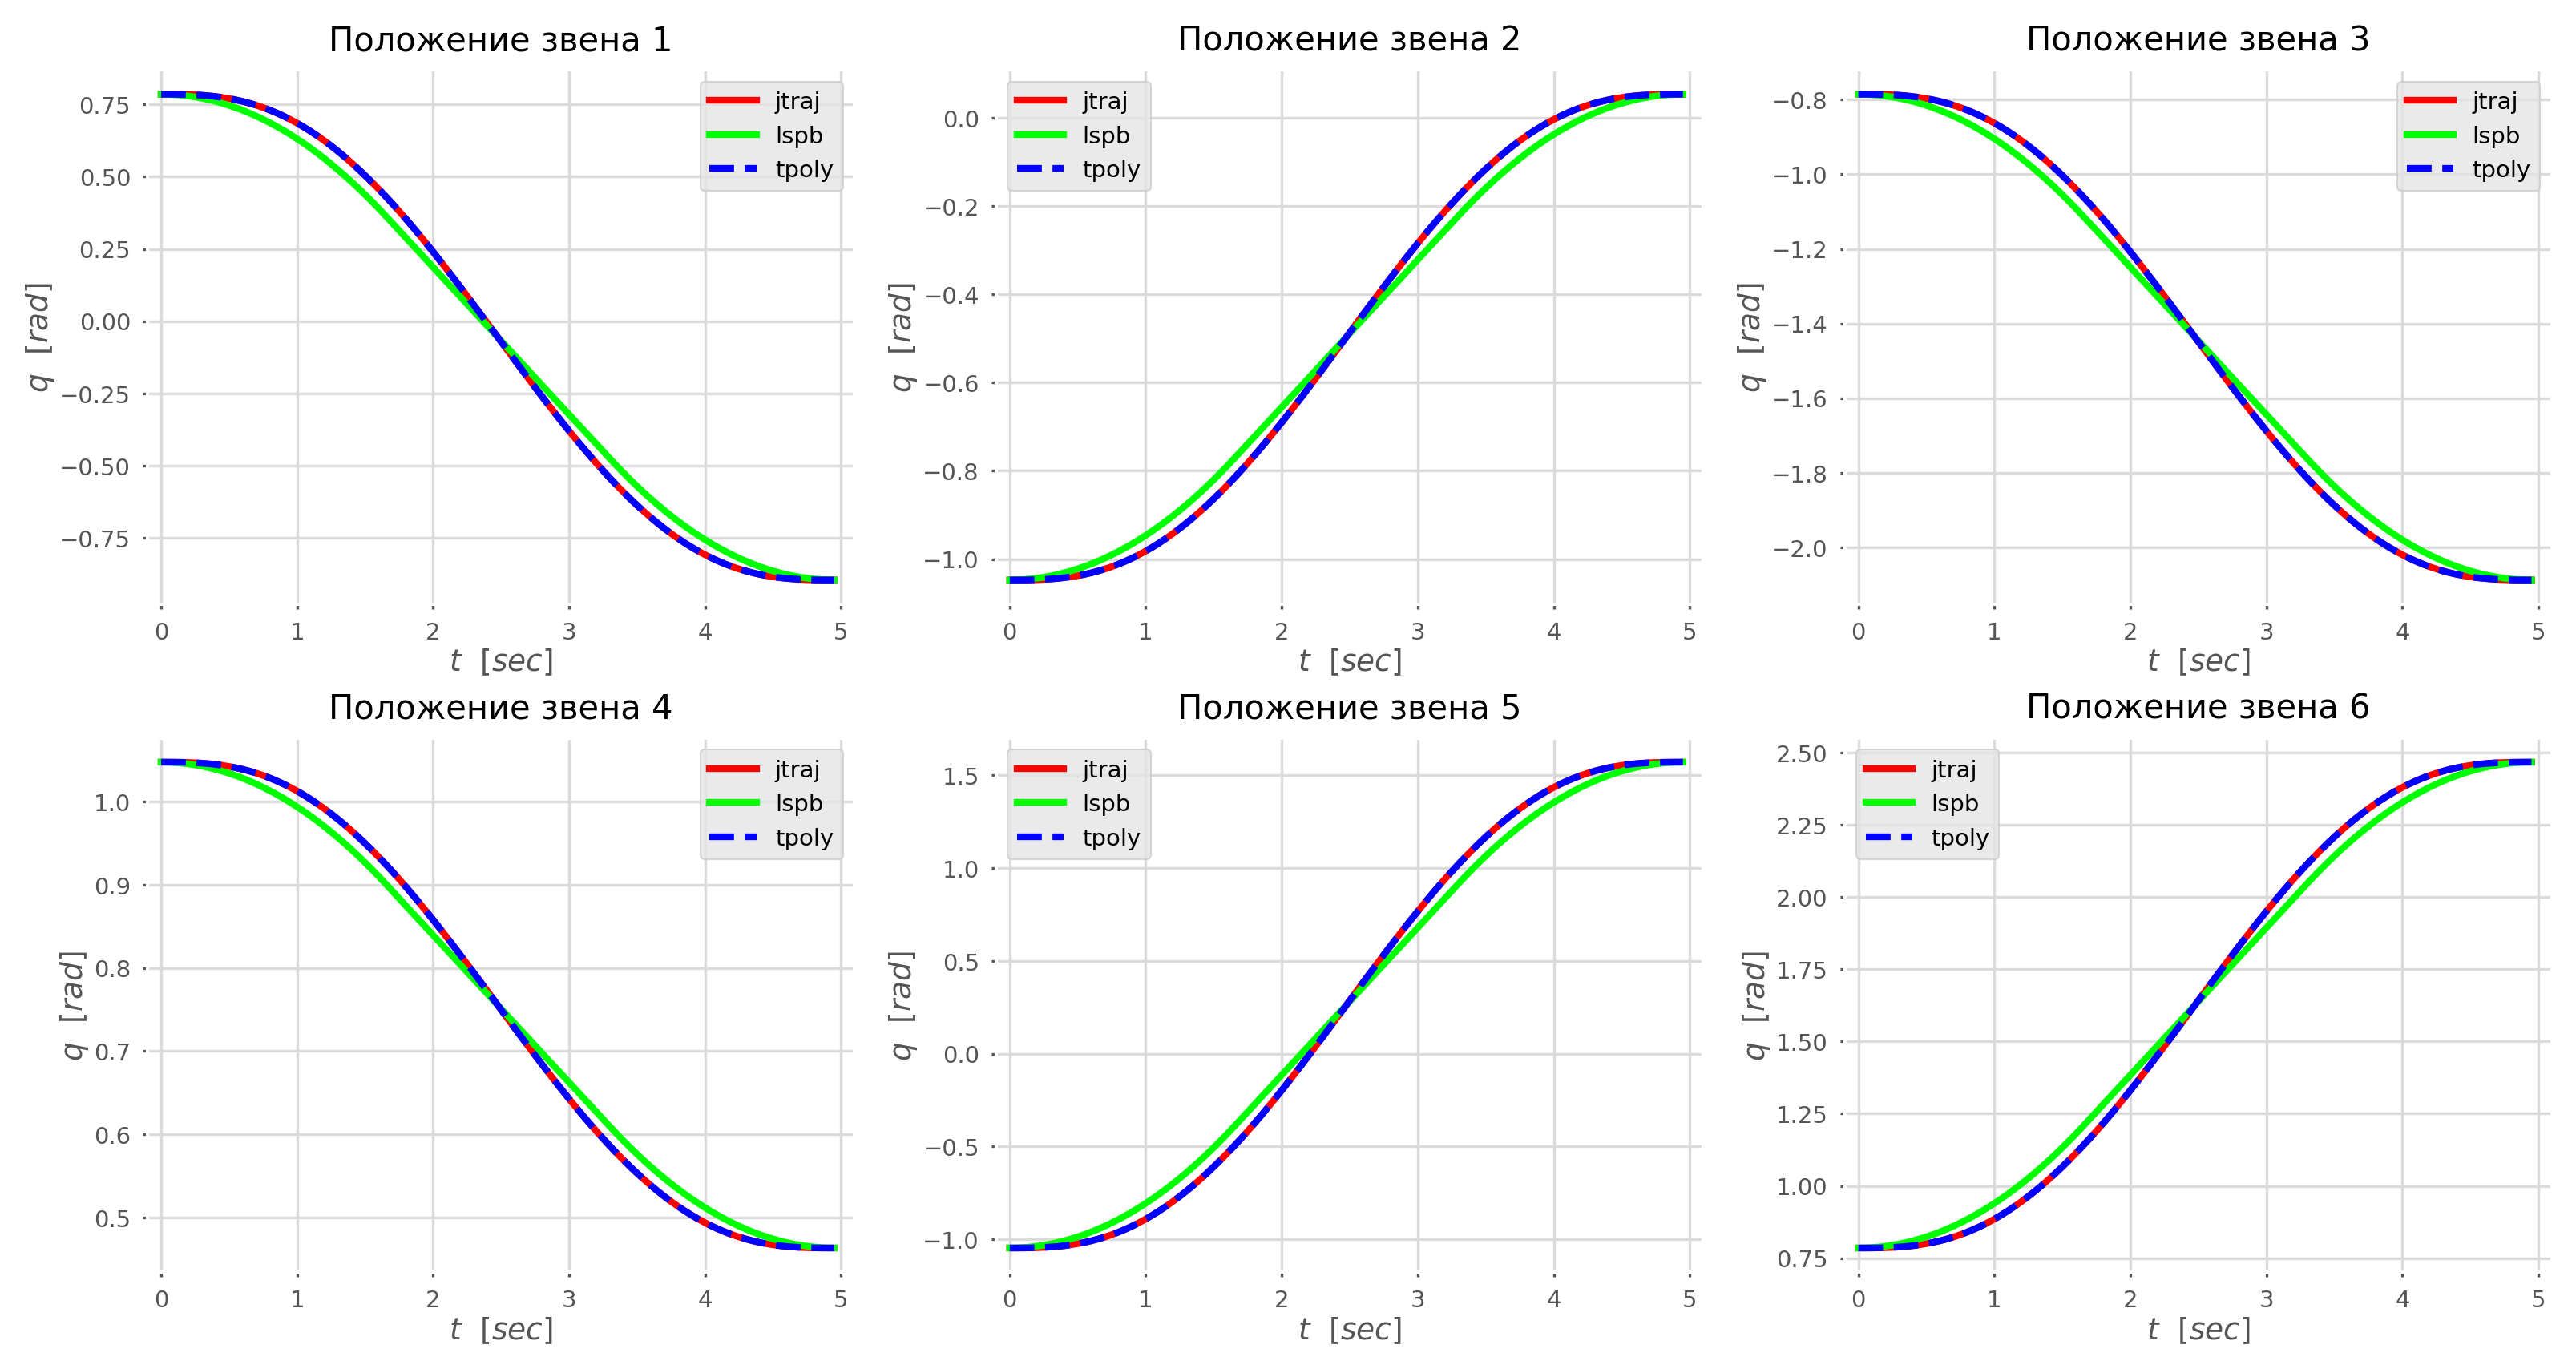

In [13]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.q[i][g-1] for i in range(len(tr_jtraj.q))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.q[i][g-1] for i in range(len(tr_trap.q))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.q[i][g-1] for i in range(len(tr_quin.q))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Положение звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$q$  [$rad$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

Построим графики скоростей для каждого звена

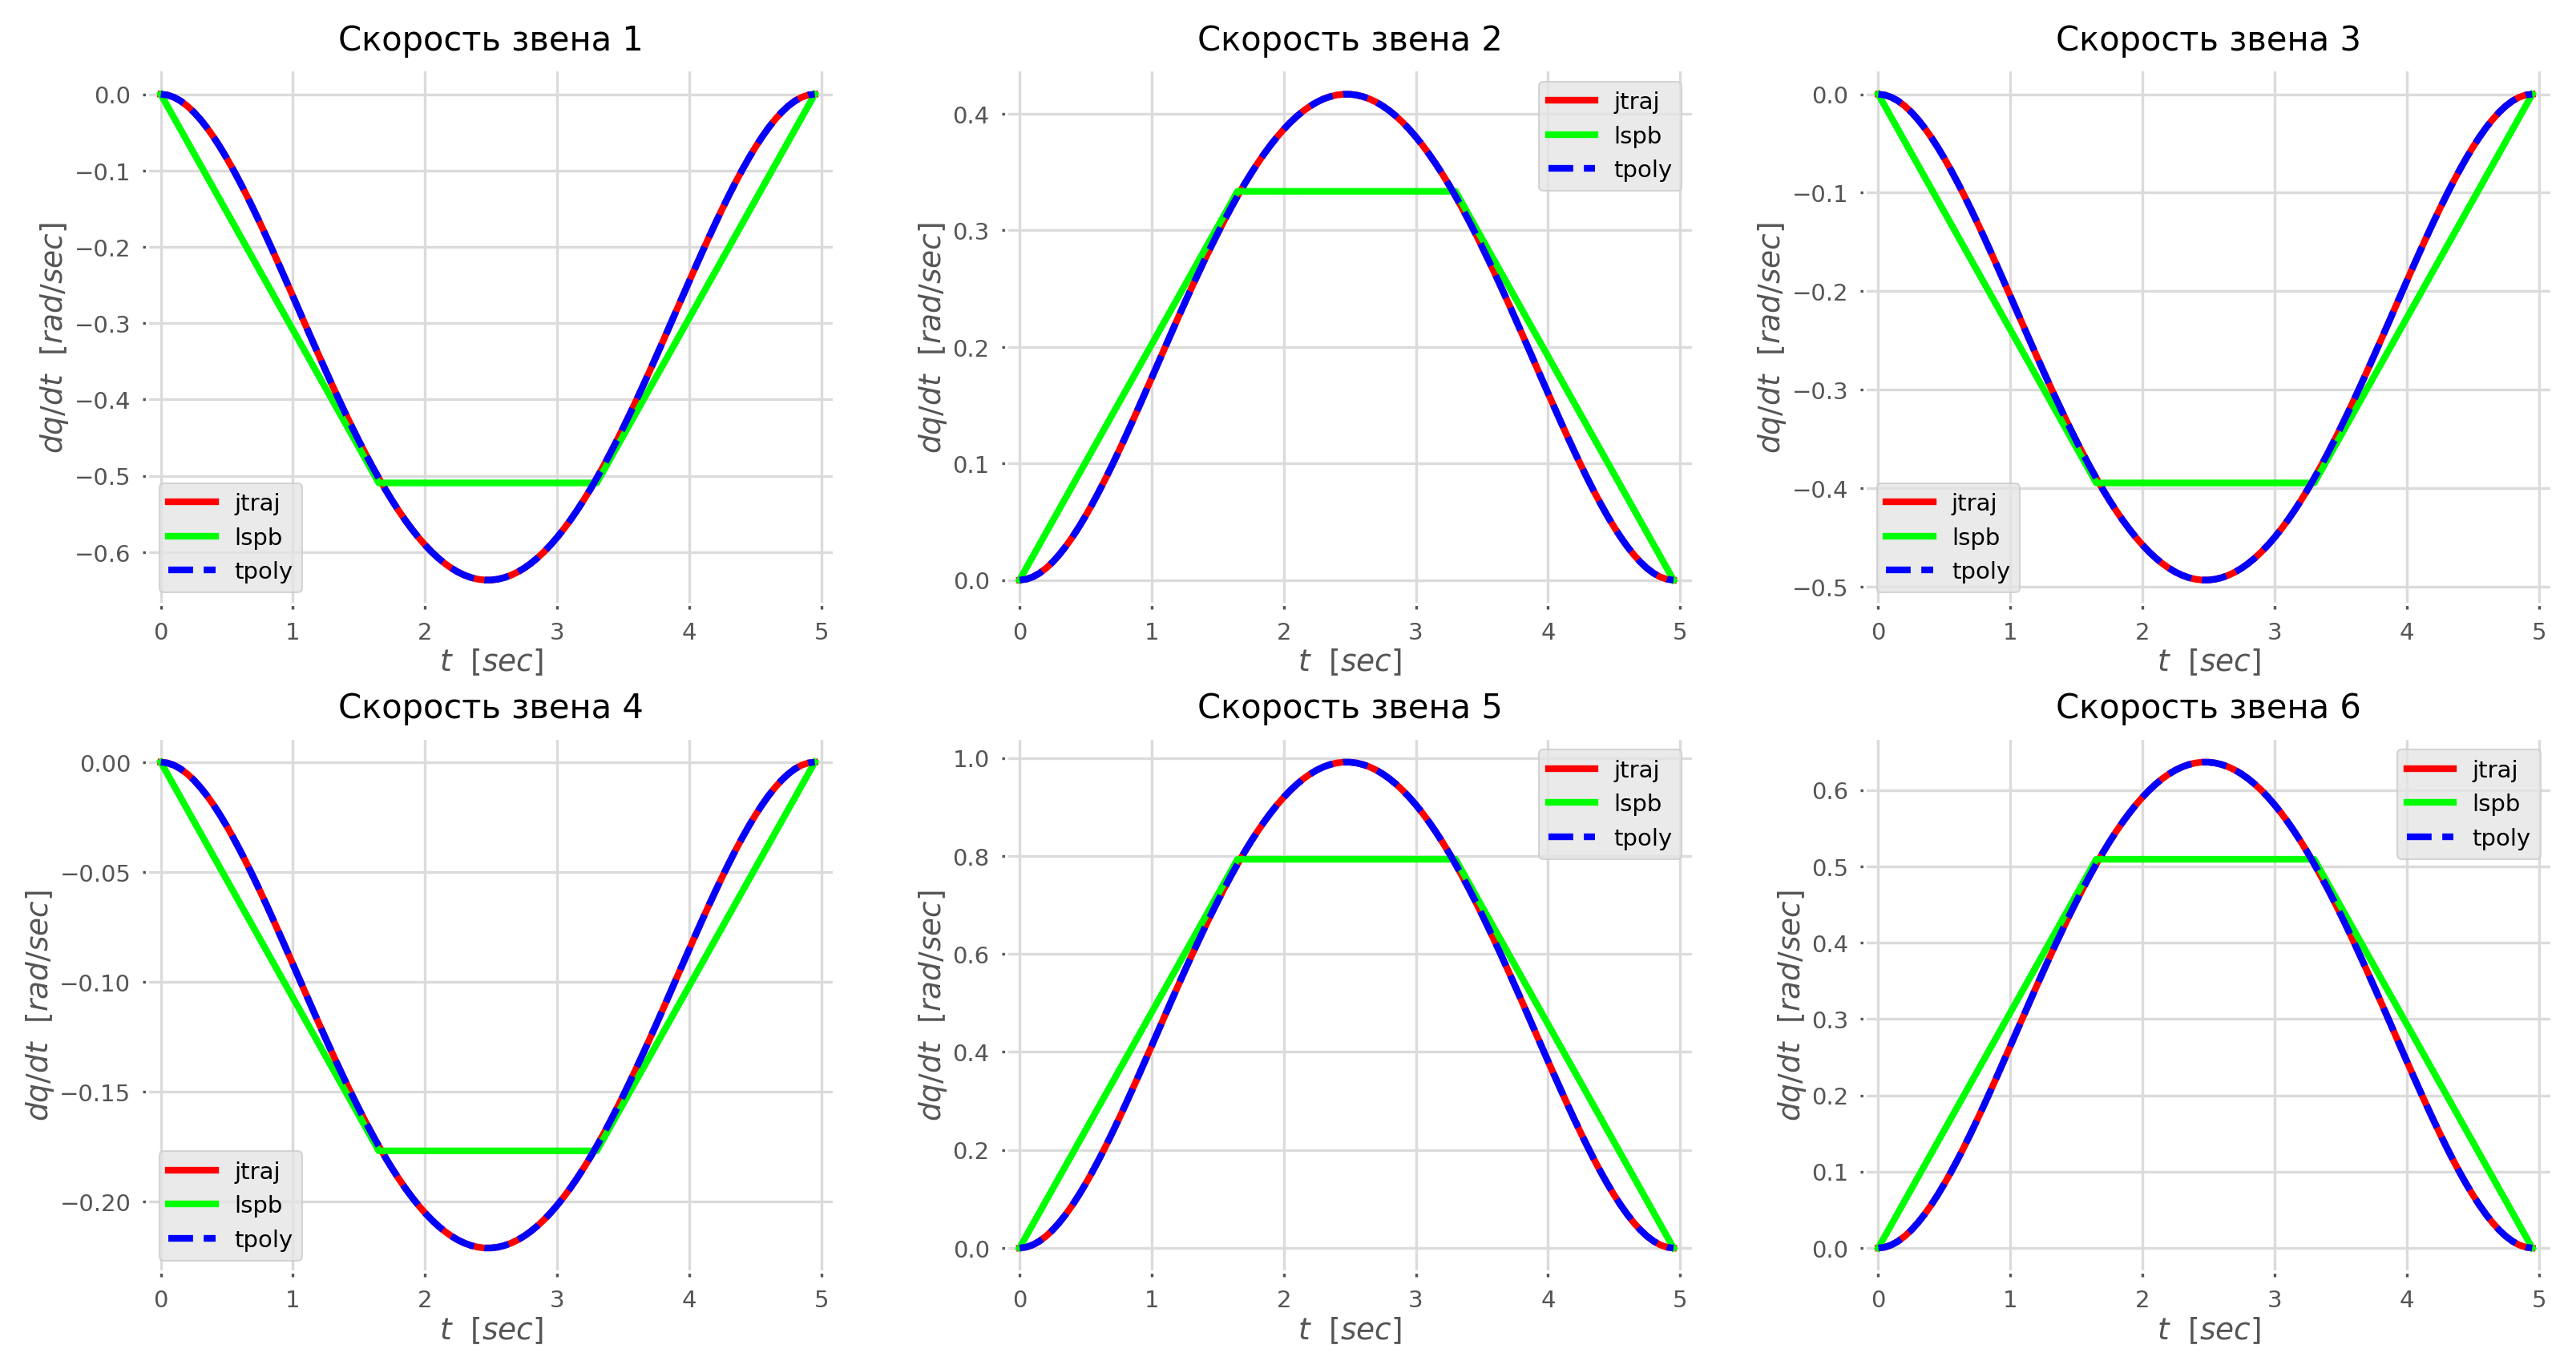

In [14]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.25, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qd[i][g-1] for i in range(len(tr_jtraj.qd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qd[i][g-1] for i in range(len(tr_trap.qd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qd[i][g-1] for i in range(len(tr_quin.qd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Скорость звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$dq/dt$  [$rad/sec$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

Построим графики ускорений для каждого звена

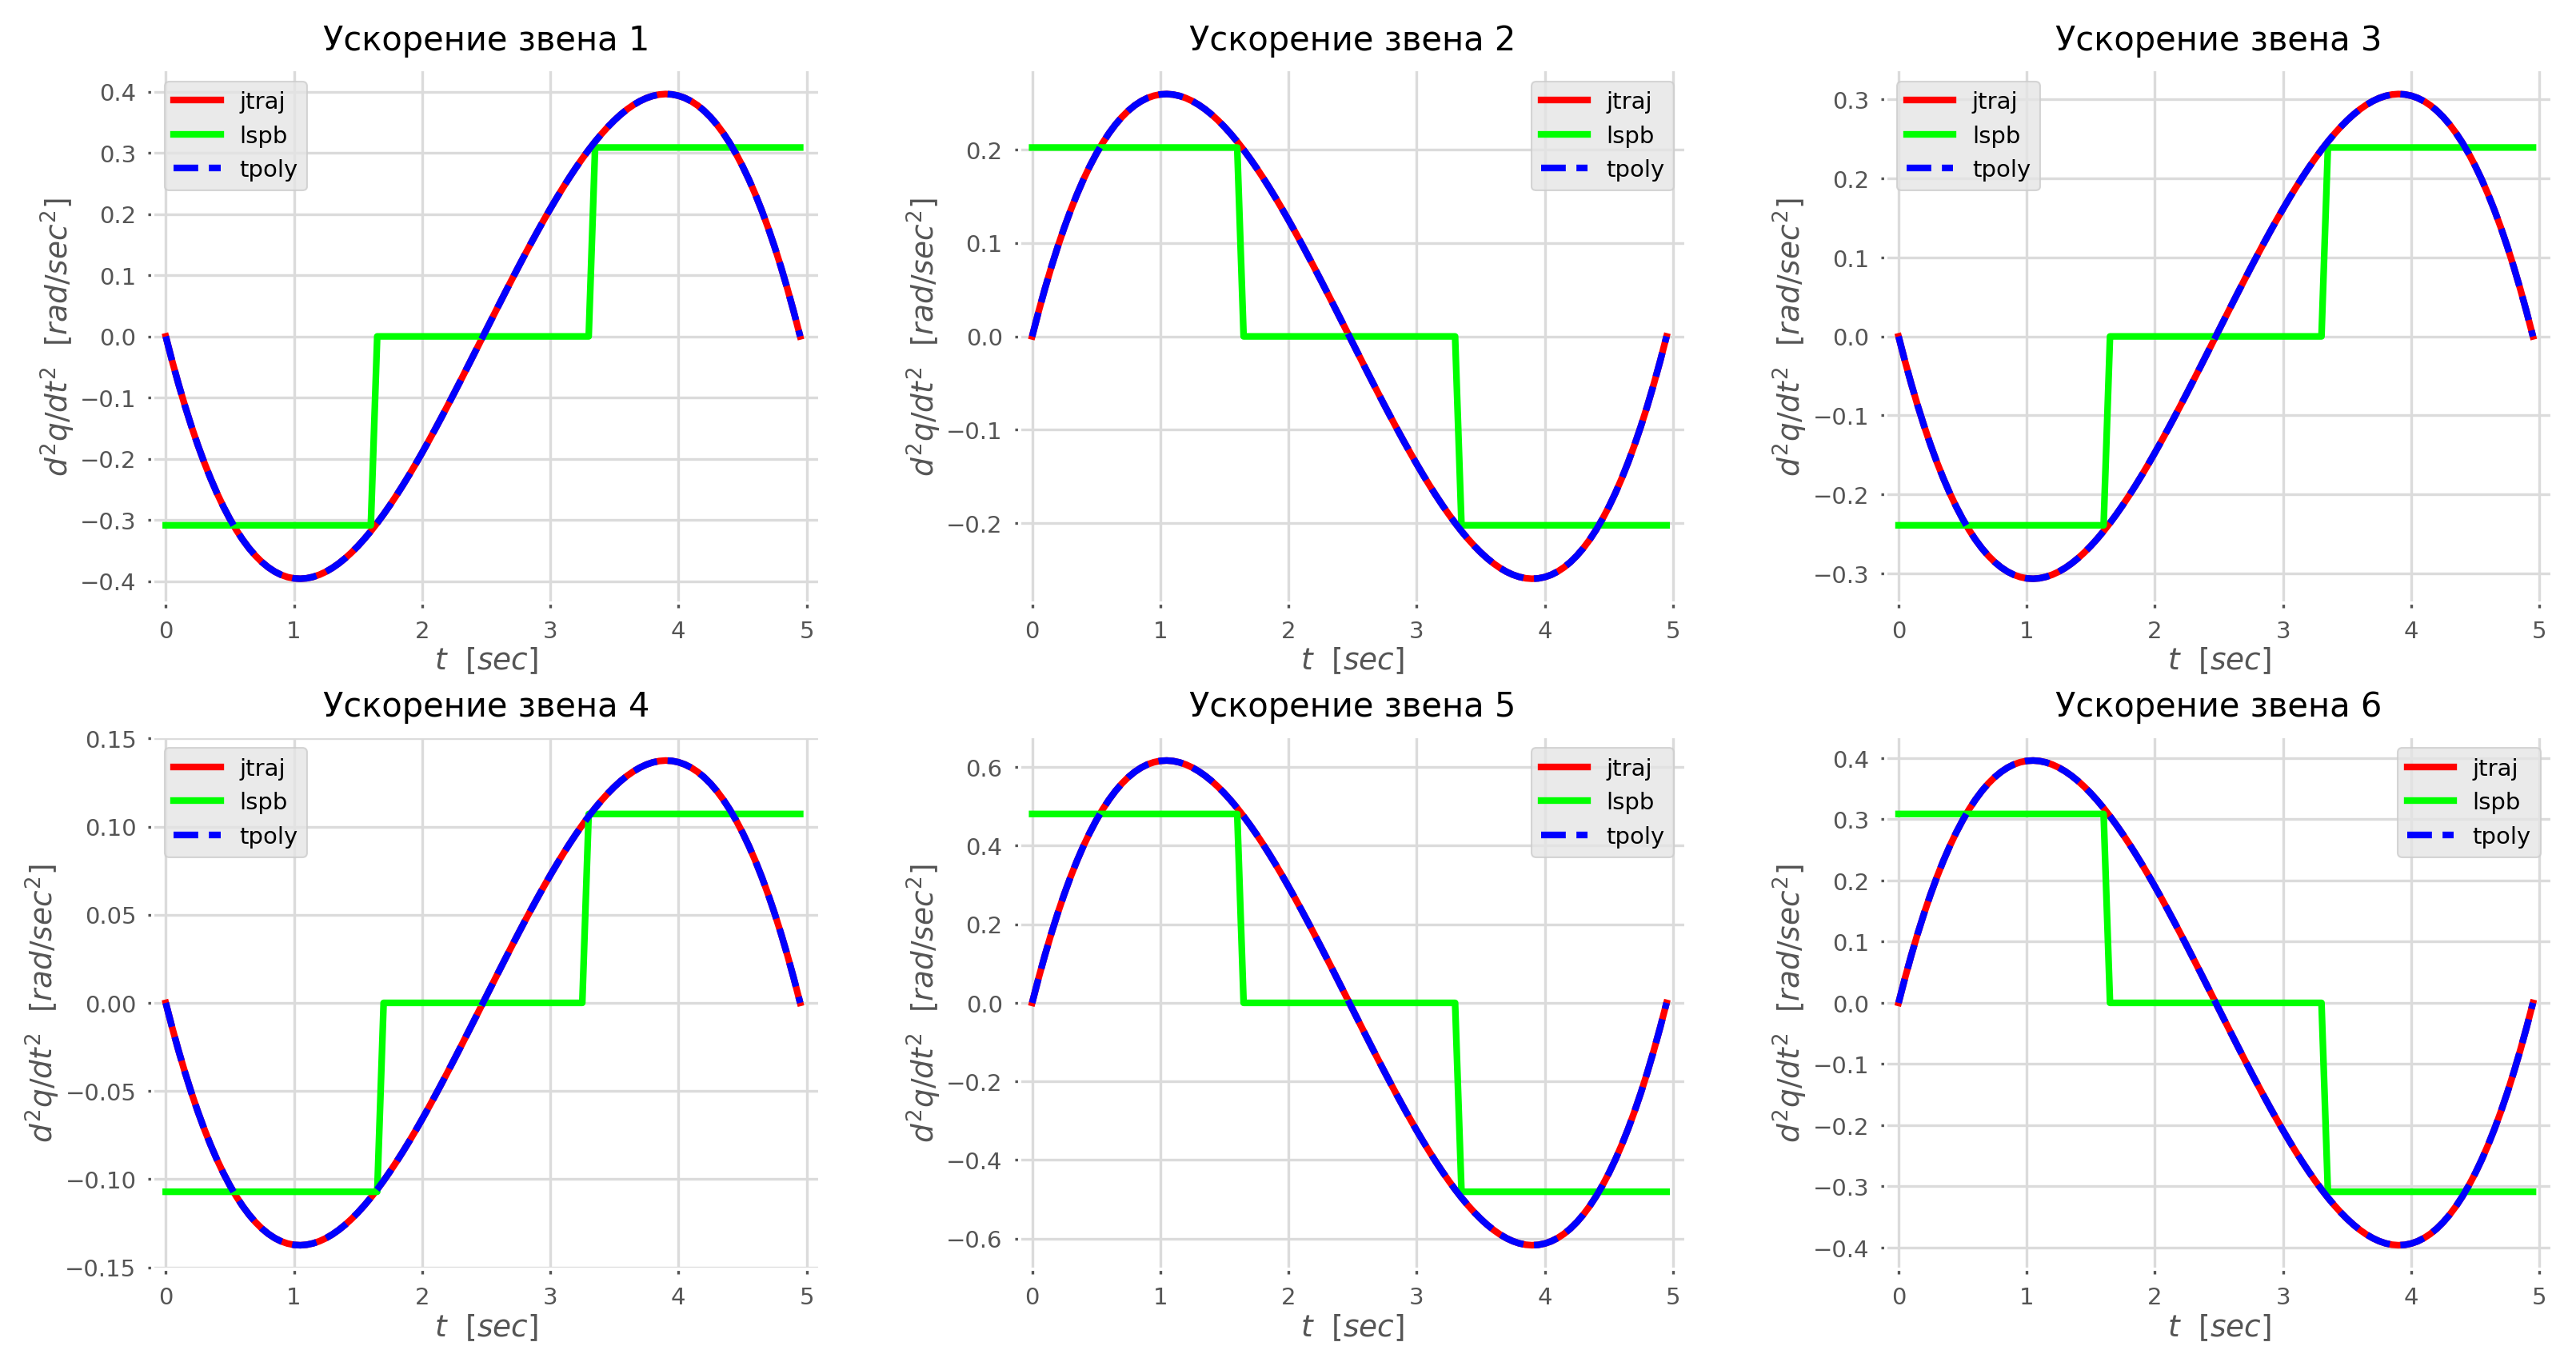

In [15]:
fig = plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qdd[i][g-1] for i in range(len(tr_jtraj.qdd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qdd[i][g-1] for i in range(len(tr_trap.qdd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qdd[i][g-1] for i in range(len(tr_quin.qdd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Ускорение звена {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"${d^2}q/d{t^2}$  [$rad/{sec}^2$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()

### Conclusion
Result shows that 5th-order (quintic) polynomial gives a smooth trajectory estimation with smooth velocity and acceleration profile as well. Trapezoidal velocity profile trajectory on the other hand, uses discerete velocity to describe the trajectory. While it is pretty accurate in modeling position, we lose some accuracy in the velocity profile and even more in the acceleration profile.